----------
**Titanic - Data Analysis + LGBM : 0.82296**
=====================================

* **Accuracy - Valid  : 0.8547**
* **Accuracy - CV    : 0.8496 (+/- 0.017)**
* **Accuracy - Public    : 0.82296**

***Vincent Lugat***

*January 2019*

----------

![](http://image.noelshack.com/fichiers/2019/05/1/1548689192-0-0-0-0lgbm.jpg)

![](http://image.noelshack.com/fichiers/2019/05/1/1548689481-0-0-0.jpg)

- <a href='#1'>1. Load libraries and read the data</a>  
    - <a href='#1.1'>1.1. Load libraries</a> 
    - <a href='#1.2'>1.2. Read the data</a> 
- <a href='#2'>2. Overview</a> 
    - <a href='#2.1'>2.1. Head</a> 
    - <a href='#2.2'>2.2. Missing values</a> 
    - <a href='#2.3'>2.3. Target</a> 
- <a href='#3'>3. Exploratory analysis and data processing</a>
    - <a href='#3.1'>3.1. Define plots</a> 
    - <a href='#3.2'>3.2. Sex</a> 
    - <a href='#3.3'>3.3. New feature : Title (From Name)</a>
    - <a href='#3.4'>3.4. Age</a>
    - <a href='#3.5'>3.5. New features : Family Size and FsizeD (From SibSp and Parch)</a>
	- <a href='#3.6'>3.6. Processing Fare (Replace missing value by Pclass = 3 's median)</a> 
    - <a href='#3.7'>3.7. New feature : Child (From Age)</a> 
    - <a href='#3.8'>3.8. New feature : Family_Survival</a>
- <a href='#4'>4. Prepare dataset</a>
	- <a href='#4.1'>4.1. Drop some features</a> 
	- <a href='#4.2'>4.2. Standard scaler & dummies transformation</a>
    - <a href='#4.3'>4.3. Correlation plot</a> 
	- <a href='#4.4'>4.4. Define (X, y)</a>
    - <a href='#4.5'>4.5. Train test split </a> 
- <a href='#5'>5. Light GBM Model</a> 
    - <a href='#5.1'>5.1. Light GBM - RandomizedSearchCV to optimise hyperparameters</a> 
    - <a href='#5.2'>5.2. Light GBM - Model performance report</a>
    - <a href='#5.3'>5.3. Light GBM - 0.8547</a>
    - <a href='#5.4'>5.4. Light GBM - Cross Validation - 5 folds - 0.8496 (+/- 0.017)</a>
	- <a href='#5.4'>5.5. Discrimination Threshold</a>
- <a href='#6'>6. Submission - 0.82296</a> 

![](http://image.noelshack.com/fichiers/2019/05/1/1548690862-0.jpg)

**Competition description :** The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

# <a id='1'>1. Load libraries and read the data</a> 

## <a id='1.1'>1.1. Load libraries</a> 

In [1]:
# Python libraries
# Classic,data manipulation and linear algebra
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import squarify

# Data processing, metrics and modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
import lightgbm as lgbm

# Stats
import scipy.stats as ss
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Time
from contextlib import contextmanager
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

## <a id='1.2'>1.2. Read data</a> 

In [2]:
# Reading dataset
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

# <a id='2'>2. Overview</a> 

## <a id='2.1'>2.1. Head</a> 

In [3]:
# Head train and test
display(train.head(),test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


* **Survival**	: 0 = No, 1 = Yes 
* **Pclass** : Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* **Sex** : Sex	 Male or Female
* **Age** : Age in years	
* **Sibsp** : number of siblings / spouses aboard the Titanic	
* **Parch** : number of parents / children aboard the Titanic	
* **Ticket** : Ticket number	
* **Fare** : Passenger fare	
* **Cabin** : Cabin number	
* **Embarked** : Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
* **Type** : train or test 

Merge train and test facilitates the exploratory analysis and the feature engineering. 

In [4]:
# Adding a column in each dataset before merging
train['Type'] = 'train'
test['Type'] = 'test'

# Merging train and test
data = train.append(test) # The entire data: train + test.

# How many rows and columns in dataset
data.shape

(1309, 13)

## <a id='2.2'>2.2. Missing values</a> 

In [5]:
# Defining missing plot to detect all missing values in dataset
def missing_plot(dataset, key) :
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((len(dataset[key]) - (len(dataset[key]) - dataset.isnull().sum()))/len(dataset[key])*100, columns = ['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = '#7EC0EE',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values (count & %)")

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [6]:
# Plotting 
missing_plot(data, 'PassengerId')

* 3/4 of Cabin are empty, we drop this variable
* 32 % of target (Survived) is missing, this is test data
* 20 % of Age is missing
* 1 Fare is empty
* 2 Embarqued are empty

## <a id='2.3'>2.3 Target</a> 

In [7]:
# Plotting target (count and %)
train = data[data['Type']=='train']

#------------COUNT-----------------------
trace = go.Bar(
        x = (train['Survived'].value_counts().values.tolist()), 
        y = ['Died', 'Survived'], 
        orientation = 'h', opacity = 0.8, 
        text=train['Survived'].value_counts().values.tolist(), 
        textfont=dict(size=15),
        textposition = 'auto',
        marker=dict(
        color=['pink', 'lightblue'],
        line=dict(color='#000000',width=1.5)
        ))

layout = dict(title =  'Count of target variable',
                        autosize = False,
                        height  = 500,
                        width   = 800)
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

#------------PERCENTAGE-------------------
trace = go.Pie(labels = ['Died', 'Survived'], values = train['Survived'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['pink', 'lightblue'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of target variable',
                        autosize = True,
                        height  = 500,
                        width   = 750)
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

# <a id='3'>3. Exploratory analysis and data processing</a> 

## <a id='3.1'>3.1. Define plots</a> 

In [8]:
# Defining horizontal bar plot to visualize each variable of dataset (train and test)
def barploth(var_select) :
    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgrey', 'orange', 'white', 'lightpink']
    trace1 = go.Bar(
        y=data[var_select].value_counts().keys().tolist(),
        x=data[var_select].value_counts().values.tolist(),
        text=data[var_select].value_counts().values.tolist(),
        textposition = 'auto',
        orientation = 'h',
        name=str(var_select),opacity = 0.8, marker=dict(color = colors,
        line=dict(color = 'black',width=1)))

    layout = dict(autosize = True,
                  height  = 500,
                  width   = 800,
                  title =  'Total'+' '+str(var_select)+' '+'(train and test)',
                  xaxis=dict(), 
                  margin=go.layout.Margin(
                    l=50))

    fig = go.Figure(data=[trace1], layout=layout)
    py.iplot(fig)

In [9]:
# Defining bar plot to visualize each variable vs target (train)
def barplot(var_select,title) :
    S = data[data['Survived']==1]
    D = data[data['Survived']==0]
    tmp1 = S
    tmp2 = D

    color=['lightskyblue','gold']
    trace2 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        text=tmp1[var_select].value_counts().values.tolist(),
        textposition = 'auto',
        name='Survived',opacity = 1, marker=dict(
        color='lightskyblue',
        line=dict(color='#000000',width=1)))

    trace1 = go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        text=tmp2[var_select].value_counts().values.tolist(),
        textposition = 'auto',
        name='Died', opacity = 1, marker=dict(
        color='pink',
        line=dict(color='#000000',width=1)))

    layout = dict(title = title,
                  autosize = True,
                  height  = 500,
                  width   = 800,
                  #barmode = 'stack',
                  xaxis=dict(), 
                  yaxis=dict(title= 'Count'),
                 legend=dict(x=-.1, y=1.5),
                 margin=go.layout.Margin(
                    b=30))

    fig = go.Figure(data=[trace1, trace2], layout=layout)
    py.iplot(fig)

In [10]:
# Defining pie plot to visualize each variable repartition vs target modalities : Survived or Died (train)
def plot_pie(var_select) :
    S = data[data['Survived']==1]
    D = data[data['Survived']==0]
    
    col =['Silver', 'gold','#CF5C36','lightblue','magenta', '#FF5D73','#F2D7EE','mediumturquoise']
    
    trace1 = go.Pie(values  = D[var_select].value_counts().values.tolist(),
                    labels  = D[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hole = 0.5, 
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [.0,.48]),
                    name    = "Died passenger",
                    marker  = dict(colors = col, line = dict(width = 1.5)))
    trace2 = go.Pie(values  = S[var_select].value_counts().values.tolist(),
                    labels  = S[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hole = 0.5,
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Survived passenger" )

    layout = go.Layout(dict(title = var_select + " distribution by target ",
                            annotations = [ dict(text = "Died"+" : "+"549",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "Survived"+" : "+"342",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))
                                          

    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

In [11]:
# Pandas crosstab %
def stats(var_select):
    stats = pd.crosstab(train['Survived'], train[var_select]).apply(lambda r: r/r.sum(), axis=0)
    return stats.style.format("{:.2%}")

## <a id='3.2'>3.2. Sex</a> 

In [12]:
# Sex EDA 
barploth('Sex')

In [13]:
stats('Sex')

Sex,female,male
Survived,,
0.0,25.80%,81.11%
1.0,74.20%,18.89%


In [14]:
barplot('Sex', 'Sex vs Survived')

In [15]:
plot_pie('Sex')

## <a id='3.3'>3.3. New feature : Title (From Name)</a> 

In [16]:
# Creating variable Title
data['Title'] = data['Name']
# Cleaning name and extracting Title
for name_string in data['Name']:
    data['Title'] = data['Name'].str.extract('([A-Za-z]+)\.', expand=True)

This function parses the names and extracts the titles.

Exemple : Wilkes, **Mrs**. James (Ellen Needs)

In [17]:
barplot('Title', 'Title vs Survived')

Some modalities can be grouped : 
* Mlle : Miss in french 
* Mme : Mrs in french
* Ms : used with the last name or full name of a woman, intended as a default form of address for women regardless of marital status
* Major: Military rank
* Col: Military rank
* Dr : Academic
* Rev : Christian clergy
* Capt: Military rank
* Jonkheer :  Honorific in the Low Countries denoting the lowest rank within the nobility for men
* Sir :Formal Honorific address for men
* Lady : Honorific address for men
* Don : Honorific prefix primarly used in Italy, Spain, Portugal for men
* Countness : Honorific address for women
* Dona : Honorific prefix primarly used in Italy, Spain, Portugal for women

In [18]:
# Replacing rare titles 
mapping = {'Mlle': 'Miss', 
           'Ms': 'Miss', 
           'Mme': 'Mrs',
           'Major': 'Other', 
           'Col': 'Other', 
           'Dr' : 'Other', 
           'Rev' : 'Other',
           'Capt': 'Other', 
           'Jonkheer': 'Royal',
           'Sir': 'Royal', 
           'Lady': 'Royal', 
           'Don': 'Royal',
           'Countess': 'Royal', 
           'Dona': 'Royal'}
data.replace({'Title': mapping}, inplace=True)
titles = ['Miss', 'Mr', 'Mrs', 'Royal', 'Other', 'Master']

In [19]:
barploth('Title')

In [20]:
barplot('Title', 'Title vs Survived')

In [21]:
plot_pie('Title')

## <a id='3.4'>3.4. Age</a> 

We have seen that the Age variable was missing 263 values ( ~ 20 % of the dataset). 

In [22]:
# Plotting age distribution vs target
S = data[data['Survived']==1]
D = data[data['Survived']==0]

def plot_distribution(var_select, title) :  
    tmp1 = S[var_select]
    tmp2 = D[var_select]
    
    trace0 = go.Histogram(
        x=tmp1, opacity=1, name='Survived', marker=dict(
        color='lightblue')
    )
    trace1 = go.Histogram(
        x=tmp2, opacity=1, name='Died', marker=dict(
        color='pink')
    )
    
    data = [trace0, trace1]
    layout = go.Layout(barmode='stack', title = title,
                  autosize = True,
                  height  = 500,
                  width   = 800,
                  #barmode = 'stack',
                  xaxis=dict(), 
                  yaxis=dict(title= 'Count'), 
                  yaxis2=dict(range= [-0, 75], 
                              overlaying= 'y', 
                              anchor= 'x', 
                              side= 'right',
                              zeroline=False,
                              showgrid= False, 
                              title= '% Died'
                             ),
                 legend=dict(x=-.1, y=1.5),
                 margin=go.layout.Margin(
                    b=0))
    fig = go.Figure(data=data, layout=layout)

    py.iplot(fig, filename = 'Density plot')



In [23]:
plot_distribution('Age', 'Age vs Survived')

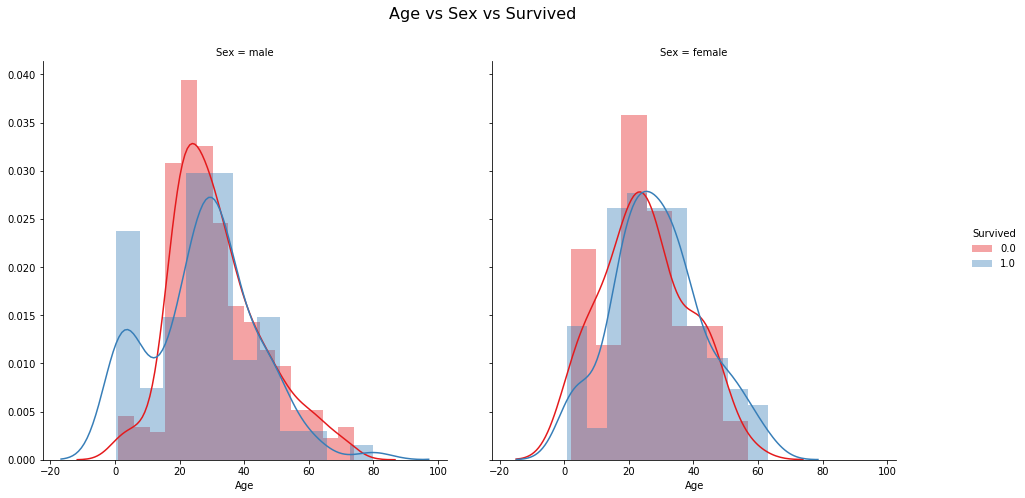

In [24]:
# Plotting age vs sex vs target
train = data[data["Type"]=="train"]
g = sns.FacetGrid(train, col="Sex", hue="Survived", palette="Set1")
g.map(sns.distplot, "Age")
g = g.add_legend()
g.fig.suptitle('Age vs Sex vs Survived', fontsize=16)
g.fig.set_size_inches(15,8)

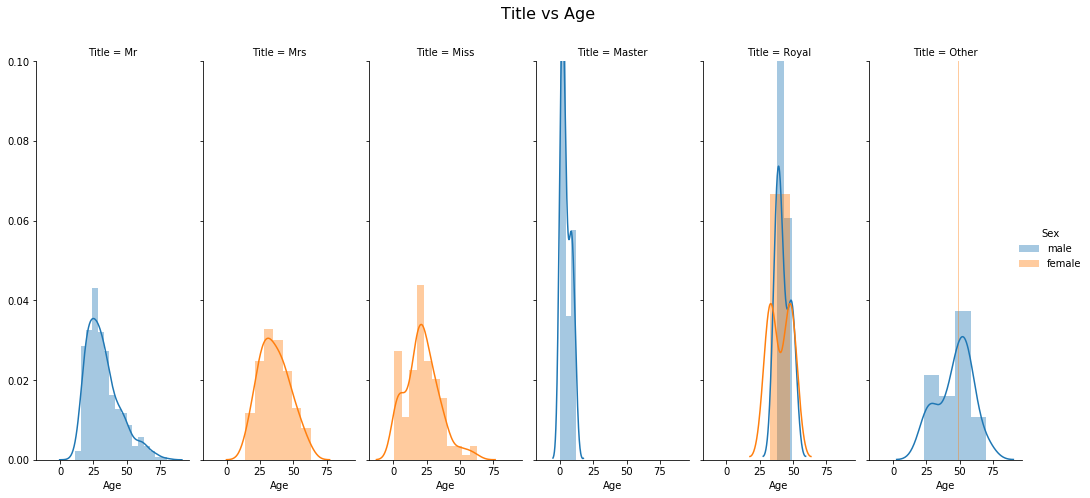

In [25]:
# Plotting title vs age vs sex
train = data[data["Type"]=="train"]
g = sns.FacetGrid(train, col="Title", hue="Sex")
g.map(sns.distplot, "Age")
g = g.add_legend()
g.set(ylim=(0, 0.1))
g.fig.suptitle('Title vs Age', fontsize=16)
g.fig.set_size_inches(15,8)

In [26]:
# Replacing missing age by median/title 
for title in titles:
    age_to_impute = data.groupby('Title')['Age'].median()[titles.index(title)]
    data.loc[(data['Age'].isnull()) & (data['Title'] == title), 'Age'] = age_to_impute

## <a id='3.5'>3.5. New feature : Family Size (From SibSp and Parch)</a> 

In [27]:
# EDA sibsp and parch
barplot('SibSp', 'SibSp vs Survived')
barplot('Parch', 'Parch vs Survived')

In [28]:
# Creating new feature : family size
data['Family_Size'] = data['Parch'] + data['SibSp'] + 1
data.loc[:,'FsizeD']='Alone'
data.loc[(data['Family_Size']>1),'FsizeD']='Small'
data.loc[(data['Family_Size']>4),'FsizeD']='Big'

In [29]:
# EDA family size
barplot('Family_Size', 'Family_size vs Survived')

In [30]:
def moscaicplot(var):
    x = 0.
    y = 0.
    width = 50.
    height = 50.
    type_list = list(data[var].unique())
    values = [len(data[data[var] == i]) for i in type_list]
    percent = [(len(data[data[var] == i])/len(data[var])*100) for i in type_list]

    normed = squarify.normalize_sizes(values, width, height)
    rects = squarify.squarify(normed, x, y, width, height)

    color_brewer =['#FF5D73','#F2D7EE','mediumturquoise','#7C7A7A','#CF5C36','lightblue','magenta']
    shapes = []
    annotations = []
    counter = 0

    for r in rects:
        shapes.append( 
            dict(type = 'rect', 
                x0 = r['x'], 
                y0 = r['y'], 
                x1 = r['x']+r['dx'], 
                y1 = r['y']+r['dy'],
                line = dict( width = 1.5, color = 'black'),
                fillcolor = color_brewer[counter]))
        annotations.append(
            dict(x = r['x']+(r['dx']/2),
                y = r['y']+(r['dy']/2),
                text = "{}<br>{}<br>{:.0f}%".format(type_list[counter], values[counter], percent[counter]), font=dict(color='black', size = 14),
                showarrow = False))
        counter = counter + 1
        if counter >= len(color_brewer):
            counter = 0

    # For hover text
    trace0 = go.Scatter(
        x = [ r['x']+(r['dx']/2) for r in rects ], 
        y = [ r['y']+(r['dy']/2) for r in rects ],
        text = [ str(v) for v in values ], 
        mode = 'text')

    layout = dict(
        autosize = True,
        height=700, 
        width=800,
        xaxis=dict(showgrid=False,zeroline=False),
        yaxis=dict(showgrid=False,zeroline=False),
        title = var +' '+ '- Distribution',
        shapes=shapes,
        annotations=annotations,
        hovermode='closest',
        font=dict(color="Black"))

    # With hovertext
    figure = dict(data=[trace0], layout=layout)
    iplot(figure, filename='squarify-treemap')

In [31]:
moscaicplot("FsizeD")

In [32]:
barplot('FsizeD', 'FsizeD vs Survived')

In [33]:
plot_pie('FsizeD')

## <a id='3.6'>3.6. Processing Fare (Replace missing value by Pclass = 3 's median)</a> 

In [34]:
data[data["Fare"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Type,Title,Family_Size,FsizeD
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,test,Mr,1,Alone


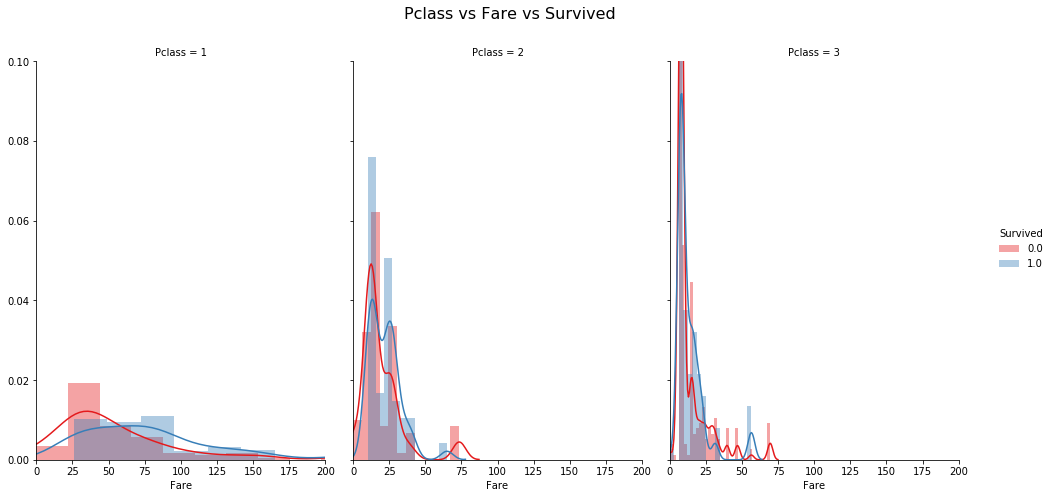

In [35]:
g = sns.FacetGrid(train, col="Pclass", hue="Survived", palette="Set1")
g.map(sns.distplot, "Fare")
g.set(ylim=(0, 0.1),xlim = (-0, 200))
g = g.add_legend()
g.fig.suptitle('Pclass vs Fare vs Survived', fontsize=16)
g.fig.set_size_inches(15,8)

In [36]:
def plot_distribution(var_select, title, bin_size) : 
    tmp1 = data[data["Pclass"] == 3]
    tmp1 = tmp1[var_select].dropna()
    hist_data = [tmp1]
    
    group_labels = [var_select]
    colors = ['gold']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, curve_type='kde', bin_size = bin_size)
    
    fig['layout'].update(title = title, autosize = True,
                        height  = 500,
                        width   = 800,annotations=[
        dict(
            x=data[data["Pclass"]==3].loc[:,"Fare"].median(),
            y=0.086,
            xref='x',
            yref='y',
            text=data[data["Pclass"]==3].loc[:,"Fare"].median(),
            showarrow=True,
            arrowhead=7,
            ax=20,
            ay=-40,
             font=dict(
                size=16,
                color='black'))])

    py.iplot(fig, filename = 'Density plot')
    
plot_distribution('Fare', 'Fare (Pclass = 3)',1)

In [37]:
fa = data[data["Pclass"]==3]
data['Fare'].fillna(fa['Fare'].median(), inplace = True)

## <a id='3.7'>3.7. New feature : Child (From Age)</a> 

In [38]:
data.loc[:,'Child']=1
data.loc[(data['Age']>=18),'Child']=0

In [39]:
barploth('Child')

In [40]:
barplot('Child', 'Child vs Survived')

In [41]:
plot_pie('Child')

## <a id='3.8'>3.8. New feature : Family_Survival</a> 

This feature is from this kernel : https://www.kaggle.com/konstantinmasich/titanic-0-82-0-83

In [42]:
data['Last_Name'] = data['Name'].apply(lambda x: str.split(x, ",")[0])

DEFAULT_SURVIVAL_VALUE = 0.5
data['Family_Survival'] = DEFAULT_SURVIVAL_VALUE

for grp, grp_df in data[['Survived','Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId',
                           'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['Last_Name', 'Fare']):
    
    if (len(grp_df) != 1):
        # A Family group is found.
        for ind, row in grp_df.iterrows():
            smax = grp_df.drop(ind)['Survived'].max()
            smin = grp_df.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            if (smax == 1.0):
                data.loc[data['PassengerId'] == passID, 'Family_Survival'] = 1
            elif (smin==0.0):
                data.loc[data['PassengerId'] == passID, 'Family_Survival'] = 0

print("Number of passengers with family survival information:", 
      data.loc[data['Family_Survival']!=0.5].shape[0])

Number of passengers with family survival information: 420


In [43]:
for _, grp_df in data.groupby('Ticket'):
    if (len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            if (row['Family_Survival'] == 0) | (row['Family_Survival']== 0.5):
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                if (smax == 1.0):
                    data.loc[data['PassengerId'] == passID, 'Family_Survival'] = 1
                elif (smin==0.0):
                    data.loc[data['PassengerId'] == passID, 'Family_Survival'] = 0
                        
print("Number of passenger with family/group survival information: " 
      +str(data[data['Family_Survival']!=0.5].shape[0]))

Number of passenger with family/group survival information: 546


# <a id='4'>4. Prepare dataset</a> 

## <a id='4.1'>4.1. Drop some features</a> 

In [44]:
data = data.drop(columns = [
                            'Age',
                            'Cabin', 
                            'Embarked',
                            'Name',
                            'Last_Name',
                            'Parch', 
                            'SibSp', 
                            'Ticket', 
                            'Family_Size',
                           ])
data.head()

,Fare,PassengerId,Pclass,Sex,Survived,Type,Title,FsizeD,Child,Family_Survival
0,7.2500,1,3,male,0.0,train,Mr,Small,0,0.5
1,71.2833,2,1,female,1.0,train,Mrs,Small,0,0.5
2,7.9250,3,3,female,1.0,train,Miss,Alone,0,0.5
3,53.1000,4,1,female,1.0,train,Mrs,Small,0,0.0
4,8.0500,5,3,male,0.0,train,Mr,Alone,0,0.5


## <a id='4.2'>4.2. Standard scaler & dummies</a> 

In [45]:
target_col = ["Survived"]
id_dataset = ["Type"]
cat_cols   = data.nunique()[data.nunique() < 12].keys().tolist()
cat_cols   = [x for x in cat_cols ]
#numerical columns
num_cols   = [x for x in data.columns if x not in cat_cols + target_col + id_dataset]
#Binary columns with 2 values
bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    data[i] = le.fit_transform(data[i])
    
#Duplicating columns for multi value columns
data = pd.get_dummies(data = data,columns = multi_cols )

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(data[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_data_og = data.copy()
data = data.drop(columns = num_cols,axis = 1)
data = data.merge(scaled,left_index=True,right_index=True,how = "left")

data = data.drop(columns = ['PassengerId'],axis = 1)

## <a id='4.3'>4.3. Correlation plot</a> 

In [46]:
def correlation_plot():
    #correlation
    correlation = data.drop(columns=['Type', 'Survived']).corr()
    #tick labels
    matrix_cols = correlation.columns.tolist()
    #convert to array
    corr_array  = np.array(correlation)
    trace = go.Heatmap(z = corr_array,
                       x = matrix_cols,
                       y = matrix_cols,
                       colorscale='Viridis',
                       colorbar   = dict() ,
                      )
    layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                            #autosize = False,
                            #height  = 1400,
                            #width   = 1600,
                            margin  = dict(r = 0 ,l = 100,
                                           t = 0,b = 100,
                                         ),
                            yaxis   = dict(tickfont = dict(size = 9)),
                            xaxis   = dict(tickfont = dict(size = 9)),
                           )
                      )
    fig = go.Figure(data = [trace],layout = layout)
    py.iplot(fig)

In [47]:
correlation_plot()

In [48]:
# Cutting train and test
train = data[data['Type'] == 1]
test = data[data['Type'] == 0]

train = train.drop(columns = ['Type'])
test = test.drop(columns = ['Type'])

## <a id='4.4'>4.4. Define (X,  y)</a> 

In [49]:
X = train.drop('Survived', 1)
y = train['Survived']
X_test = test
X_test = X_test.drop(columns = ['Survived'
                           ])

## <a id='4.5'>4.5. Train test split</a> 

In [50]:
# Train_test split
random_state = 42
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = random_state)

# <a id='5'>5. Light GBM model</a> 

## <a id='5.1'>5.1. Light GBM -  RandomizedSearchCV to optimise hyperparameters</a> 

In [51]:
fit_params = {"early_stopping_rounds" : 100, 
             "eval_metric" : 'auc', 
             "eval_set" : [(X_train,y_train)],
             'eval_names': ['valid'],
             'verbose': 0,
             'categorical_feature': 'auto'}

param_test = {'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4],
              'n_estimators' : [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
              'num_leaves': sp_randint(6, 50), 
              'min_child_samples': sp_randint(100, 500), 
              'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
              'subsample': sp_uniform(loc=0.2, scale=0.8), 
              'max_depth': [-1, 1, 2, 3, 4, 5, 6, 7],
              'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
              'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

#number of combinations
n_iter = 500 

#intializing lgbm and lunching the search
lgbm_clf = lgbm.LGBMClassifier(random_state=random_state, silent=True, metric='None', n_jobs=4)
grid_search = RandomizedSearchCV(
    estimator=lgbm_clf, param_distributions=param_test, 
    n_iter=n_iter,
    scoring='accuracy',
    cv=5,
    refit=True,
    random_state=random_state,
    verbose=True)

grid_search.fit(X, y, **fit_params)
print('Best score reached: {} with params: {} '.format(grid_search.best_score_, grid_search.best_params_))

opt_parameters =  grid_search.best_params_

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best score reached: 0.8484848484848485 with params: {'colsample_bytree': 0.45579438389387933, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_samples': 103, 'min_child_weight': 0.01, 'n_estimators': 1000, 'num_leaves': 42, 'reg_alpha': 10, 'reg_lambda': 5, 'subsample': 0.6485280755329368} 


[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed:  2.8min finished


## <a id='5.2'>5.2. Light GBM - Model performance report</a> 

In [52]:
def model_performance(model) : 
    #Conf matrix
    conf_matrix = confusion_matrix(y_valid, y_pred)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)"],
                        y = ["0 (true)","1 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False)

    #Show metrics
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    fp = conf_matrix[0,1]
    tn = conf_matrix[0,0]
    Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
    Precision =  (tp/(tp+fp))
    Recall    =  (tp/(tp+fn))
    F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                    y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto', textfont=dict(color='black'),
                    orientation = 'h', opacity = 1, marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
    
    #Roc curve
    model_roc_auc = round(roc_auc_score(y_valid, y_score) , 3)
    fpr, tpr, t = roc_curve(y_valid, y_score)
    trace3 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2), fill='tozeroy')
    trace4 = go.Scatter(x = [0,1],y = [0,1],
                        line = dict(color = ('black'),width = 1.5,
                        dash = 'dot'))
    
    # Precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_valid, y_score)
    trace5 = go.Scatter(x = recall, y = precision,
                        name = "Precision" + str(precision),
                        line = dict(color = ('lightcoral'),width = 2), fill='tozeroy')
    
    #Feature importance
    coefficients  = pd.DataFrame(eval(model).feature_importances_)
    column_data   = pd.DataFrame(list(train))
    coef_sumry    = (pd.merge(coefficients,column_data,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    coef_sumry = coef_sumry[coef_sumry["coefficients"] !=0]
    trace6 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients", 
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Viridis",
                                  line = dict(width = .6,color = "black")))
    
    #Cumulative gain
    pos = pd.get_dummies(y_valid).as_matrix()
    pos = pos[:,1] 
    npos = np.sum(pos)
    index = np.argsort(y_score) 
    index = index[::-1] 
    sort_pos = pos[index]
    #cumulative sum
    cpos = np.cumsum(sort_pos) 
    #recall
    recall = cpos/npos 
    #size obs test
    n = y_valid.shape[0] 
    size = np.arange(start=1,stop=369,step=1) 
    #proportion
    size = size / n 
    #plots
    model = model
    trace7 = go.Scatter(x = size,y = recall,
                        line = dict(color = ('gold'),width = 2), fill='tozeroy') 
    
    #Subplots
    fig = tls.make_subplots(rows=4, cols=2, print_grid=False,
                          specs=[[{}, {}], 
                                 [{}, {}],
                                 [{'colspan': 2}, None],
                                 [{'colspan': 2}, None]],
                          subplot_titles=('Confusion Matrix',
                                          'Metrics',
                                          'ROC curve'+" "+ '('+ str(model_roc_auc)+')',
                                          'Precision - Recall curve',
                                          'Cumulative gains curve',
                                          'Feature importance'
                                          ))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,2,1)
    fig.append_trace(trace4,2,1)
    fig.append_trace(trace5,2,2)
    fig.append_trace(trace6,4,1)
    fig.append_trace(trace7,3,1)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                         autosize = False, 
                         height = 1500,
                         width = 800,
                         plot_bgcolor = 'black',
                         paper_bgcolor = 'black',
                         margin = dict(b = 195), 
                         font=dict(color='white')
                        )
    
    fig["layout"]["xaxis1"].update(dict(color = 'white'),showgrid=False)
    fig["layout"]["yaxis1"].update(dict(color = 'white'),showgrid=False)
    fig["layout"]["xaxis2"].update((dict(range=[0, 1], color = 'white')),showgrid=False)
    fig["layout"]["yaxis2"].update(dict(color = 'white'),showgrid=False)
    fig["layout"]["xaxis3"].update(dict(title = "false positive rate"),showgrid=False)
    fig["layout"]["yaxis3"].update(dict(title = "true positive rate"),color = 'white',showgrid=False)
    fig["layout"]["xaxis4"].update(dict(title = "recall"), range = [0,1.05],color = 'white',showgrid=False)
    fig["layout"]["yaxis4"].update(dict(title = "precision"), range = [0,1.05],color = 'white',showgrid=False)
    fig["layout"]["xaxis5"].update(dict(title = "Percentage contacted"),color = 'white',showgrid=False)
    fig["layout"]["yaxis5"].update(dict(title = "Percentage positive targeted"),color = 'white',showgrid=False)
    fig["layout"]["xaxis6"].update(dict(color = 'white'),showgrid=False)
    fig["layout"]["yaxis6"].update(dict(color = 'white'),showgrid=False)
    for i in fig['layout']['annotations']:
        i['font'] = titlefont=dict(color='white', size = 14)
    py.iplot(fig)

## <a id='5.3'>5.3. Light GBM - 0.8547</a> 

In [53]:
%%time
lgbm_clf = lgbm.LGBMClassifier(**opt_parameters)

lgbm_clf.fit(X_train, y_train)
y_pred = lgbm_clf.predict(X_valid)
y_score = lgbm_clf.predict_proba(X_valid)[:,1]

model_performance('lgbm_clf')

CPU times: user 1.18 s, sys: 88 ms, total: 1.27 s
Wall time: 825 ms


## <a id='5.4'>5.4. Light GBM - Cross Validation - 5 folds - 0.8496 (+/- 0.017)</a> 

In [54]:
scores = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
res = []
for sc in scores:
    scores = cross_val_score(lgbm_clf, X, y, cv = 5, scoring = sc)
    #print(sc, scores)
    res.append(scores)
df = pd.DataFrame(res).T
df.loc['mean'] = df.mean()
df.loc['std'] = df.std()
df= df.rename(columns={0: 'accuracy', 1:'precision', 2:'recall',3:'f1',4:'roc_auc'})

trace = go.Table(
    header=dict(values=['<b>Fold', '<b>Accuracy', '<b>Precision', '<b>Recall', '<b>F1 score', '<b>Roc auc'],
                line = dict(color='#7D7F80'),
                fill = dict(color='#a1c3d1'),
                align = ['center'],
                font = dict(size = 15)),
    cells=dict(values=[('1','2','3','4','5','mean', 'std'),
                       np.round(df['accuracy'],4),
                       np.round(df['precision'],4),
                       np.round(df['recall'],4),
                       np.round(df['f1'],4),
                       np.round(df['roc_auc'],4)],
               line = dict(color='#7D7F80'),
               fill = dict(color='#EDFAFF'),
               align = ['center'], font = dict(size = 15)))

layout = dict(width=800, height=400, title = '<b>Cross validation - 5 folds', font = dict(size = 15))
fig = dict(data=[trace], layout=layout)
py.iplot(fig, filename = 'styled_table')

In [55]:
lgbm_clf = lgbm.LGBMClassifier(**opt_parameters)
lgbm_clf.fit(X, y)
y_pred = lgbm_clf.predict(X_test)

## <a id='5.5'>5.5. Discrimination Threshold</a> 

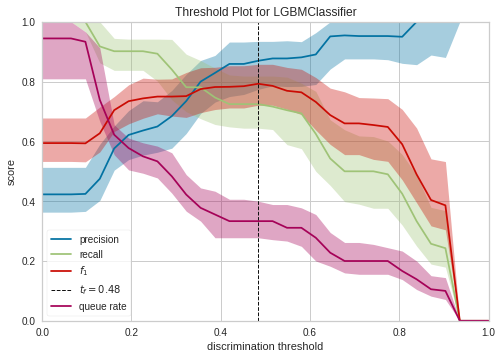

In [56]:
from yellowbrick.classifier import DiscriminationThreshold
visualizer = DiscriminationThreshold(lgbm_clf)

visualizer.fit(X, y)  
visualizer.poof()   

# <a id='6'>6. Submission - 0.82296</a> 

In [57]:
temp = pd.DataFrame(pd.read_csv("../input/test.csv")['PassengerId'])
temp['Survived'] = y_pred
temp.to_csv("../working/submission.csv", index = False)

**Thank you all ! Merci à tous ! :)**